In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
train_data = datasets.MNIST(root='../Data', train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root='../Data', train=False, transform=transforms.ToTensor(), download=True)

In [115]:
epochs = 10
batch_size = 50
input_size = 784
output_size = 10
learning_rate = 0.001

In [116]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [117]:
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [118]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [119]:
model = ConvolutionalNetwork()

In [120]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [121]:
for p in model.parameters():
    print(p.numel())

54
6
864
16
48000
120
10080
84
840
10


In [122]:
def check_accuracy(data_loader, model):
    correct = 0
    samples = 0
    data_loader_type = 'Train Dataset' if data_loader.dataset.train else 'Test Dataset'
    model.eval()
    with torch.no_grad():
        for x, y in data_loader:
            y_pred = model(x)

            y_pred = torch.max(y_pred, dim=1)[1]

            correct += (y_pred == y).sum()
            samples += y_pred.size(0)

        accuracy = correct / samples
        print(f'{data_loader_type} with Accuracy: {correct} / {samples} = {accuracy*100:.2f}')
    model.train()
    return [correct, samples, accuracy]

In [123]:
train_losses = []
train_accuracy = []
test_accuracy = []

for epoch in range(epochs):

    train_acc = check_accuracy(train_loader, model)
    test_acc = check_accuracy(test_loader, model)

    for batch_index, (x_train, y_train) in enumerate(train_loader):
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)

        y_pred = torch.max(y_pred, dim=1)[1]

        if batch_index == 0:
            train_losses.append(loss.item())
            train_accuracy.append(train_acc[2]*100)
            test_accuracy.append(test_acc[2]*100)
            print(f'Epoch: {epoch} & Train Losses: {loss.item():.4f}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    print('-'*50)

Train Dataset with Accuracy: 5923 / 60000 = 9.87
Test Dataset with Accuracy: 980 / 10000 = 9.80
Epoch: 0 & Train Losses: 2.3275
--------------------------------------------------
Train Dataset with Accuracy: 57041 / 60000 = 95.07
Test Dataset with Accuracy: 9498 / 10000 = 94.98
Epoch: 1 & Train Losses: 0.1838
--------------------------------------------------
Train Dataset with Accuracy: 58652 / 60000 = 97.75
Test Dataset with Accuracy: 9753 / 10000 = 97.53
Epoch: 2 & Train Losses: 0.1032
--------------------------------------------------
Train Dataset with Accuracy: 58682 / 60000 = 97.80
Test Dataset with Accuracy: 9787 / 10000 = 97.87
Epoch: 3 & Train Losses: 0.1717
--------------------------------------------------
Train Dataset with Accuracy: 59283 / 60000 = 98.81
Test Dataset with Accuracy: 9847 / 10000 = 98.47
Epoch: 4 & Train Losses: 0.0293
--------------------------------------------------
Train Dataset with Accuracy: 59318 / 60000 = 98.86
Test Dataset with Accuracy: 9859 / 100

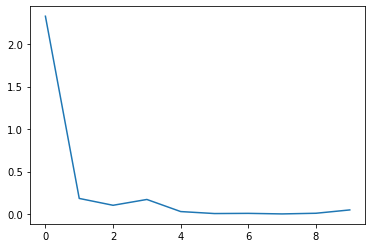

In [124]:
plt.plot(train_losses)

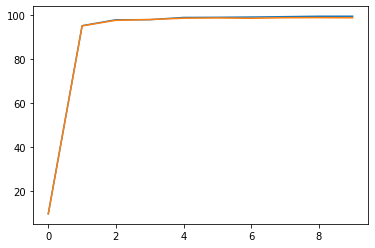

In [125]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)